In [3]:
import pickle
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
df = pd.read_csv('.../clean_text.csv')
df

,voted_up,clean_token,clean_str
0,True,"['fall', 'guy', 'chill', 'fun', 'game', 'reall...",fall guy chill fun game really need server imp...
1,True,"['give', 'little', 'hug', 'player', 'stare', '...",give little hug player stare back second jump ...
2,True,"['reccomend', 'much', 'buy']",reccomend much buy
3,True,"['hug', 'people']",hug people
4,True,"['little', 'boy', 'like', 'see', 'wipeout', 't...",little boy like see wipeout tv always dream ta...
...,...,...,...
13089,True,"['well', 'make', 'game', 'get', 'enough', 'man...",well make game get enough many way differentia...
13090,True,"['fun', 'competitive', 'especially', 'friend',...",fun competitive especially friend recommend bu...
13091,True,"['game', 'extremely', 'fun', 'nice', 'break', ...",game extremely fun nice break usual drop loot ...
13092,True,"['fun', 'play', 'keep', 'work', 'game']",fun play keep work game


In [6]:
df = df[['voted_up','clean_str']]
df

,voted_up,clean_str
0,True,fall guy chill fun game really need server imp...
1,True,give little hug player stare back second jump ...
2,True,reccomend much buy
3,True,hug people
4,True,little boy like see wipeout tv always dream ta...
...,...,...
13089,True,well make game get enough many way differentia...
13090,True,fun competitive especially friend recommend bu...
13091,True,game extremely fun nice break usual drop loot ...
13092,True,fun play keep work game


In [7]:
df.clean_str=df.clean_str.astype(str)

In [8]:
sid = SentimentIntensityAnalyzer()

In [11]:
df['scores'] = df['clean_str'].apply(lambda review: sid.polarity_scores(review))

df

,voted_up,clean_str,scores
0,True,fall guy chill fun game really need server imp...,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp..."
1,True,give little hug player stare back second jump ...,"{'neg': 0.229, 'neu': 0.634, 'pos': 0.137, 'co..."
2,True,reccomend much buy,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,True,hug people,"{'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'comp..."
4,True,little boy like see wipeout tv always dream ta...,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp..."
...,...,...,...
13089,True,well make game get enough many way differentia...,"{'neg': 0.06, 'neu': 0.492, 'pos': 0.447, 'com..."
13090,True,fun competitive especially friend recommend bu...,"{'neg': 0.0, 'neu': 0.21, 'pos': 0.79, 'compou..."
13091,True,game extremely fun nice break usual drop loot ...,"{'neg': 0.154, 'neu': 0.411, 'pos': 0.434, 'co..."
13092,True,fun play keep work game,"{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'comp..."


In [12]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df

,voted_up,clean_str,scores,compound
0,True,fall guy chill fun game really need server imp...,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp...",0.7430
1,True,give little hug player stare back second jump ...,"{'neg': 0.229, 'neu': 0.634, 'pos': 0.137, 'co...",-0.4391
2,True,reccomend much buy,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,True,hug people,"{'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'comp...",0.4767
4,True,little boy like see wipeout tv always dream ta...,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp...",0.8257
...,...,...,...,...
13089,True,well make game get enough many way differentia...,"{'neg': 0.06, 'neu': 0.492, 'pos': 0.447, 'com...",0.9460
13090,True,fun competitive especially friend recommend bu...,"{'neg': 0.0, 'neu': 0.21, 'pos': 0.79, 'compou...",0.8826
13091,True,game extremely fun nice break usual drop loot ...,"{'neg': 0.154, 'neu': 0.411, 'pos': 0.434, 'co...",0.8467
13092,True,fun play keep work game,"{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'comp...",0.6908


Text(0.5, 1.0, &#39;Compound Sentiment Distribution&#39;)

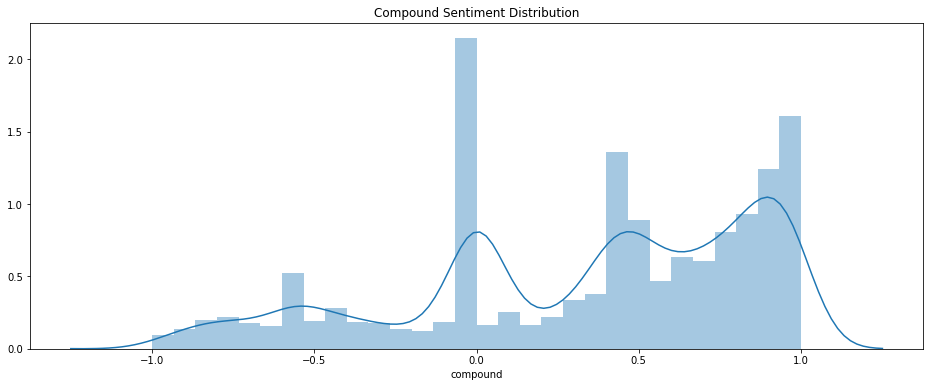

In [13]:
plt.figure(figsize=(16, 6))
sns.distplot(df['compound']).set_title('Compound Sentiment Distribution')

Text(0.5, 1.0, &#39;Sentiment Distribution&#39;)

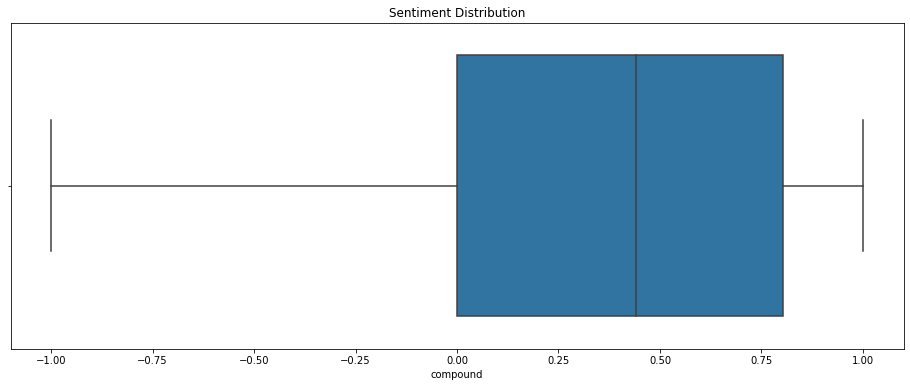

In [14]:
plt.figure(figsize=(16, 6))
sns.boxplot(df['compound']).set_title('Sentiment Distribution')

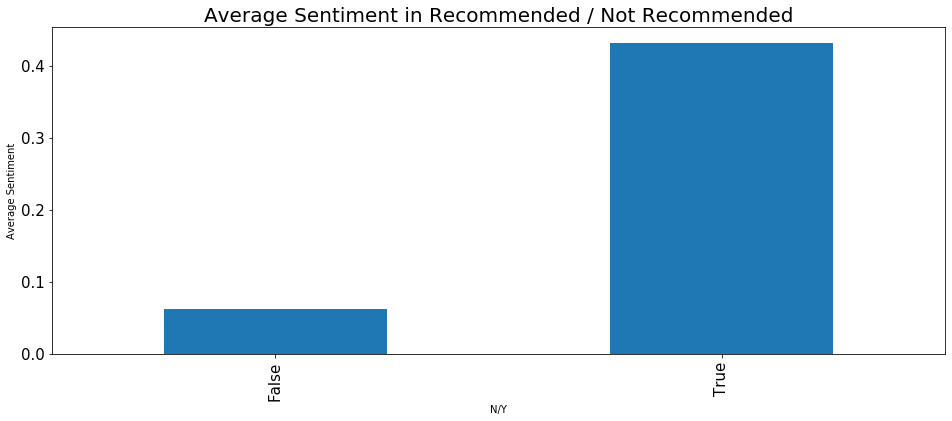

In [15]:
polarity_avg = df.groupby('voted_up')['compound'].mean().plot(kind='bar', figsize=(16,6))
plt.xlabel('N/Y', fontsize=10)
plt.ylabel('Average Sentiment', fontsize=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Average Sentiment in Recommended / Not Recommended', fontsize=20)
plt.show()

In [17]:
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df

,voted_up,clean_str,scores,compound,comp_score
0,True,fall guy chill fun game really need server imp...,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp...",0.7430,pos
1,True,give little hug player stare back second jump ...,"{'neg': 0.229, 'neu': 0.634, 'pos': 0.137, 'co...",-0.4391,neg
2,True,reccomend much buy,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,True,hug people,"{'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'comp...",0.4767,pos
4,True,little boy like see wipeout tv always dream ta...,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp...",0.8257,pos
...,...,...,...,...,...
13089,True,well make game get enough many way differentia...,"{'neg': 0.06, 'neu': 0.492, 'pos': 0.447, 'com...",0.9460,pos
13090,True,fun competitive especially friend recommend bu...,"{'neg': 0.0, 'neu': 0.21, 'pos': 0.79, 'compou...",0.8826,pos
13091,True,game extremely fun nice break usual drop loot ...,"{'neg': 0.154, 'neu': 0.411, 'pos': 0.434, 'co...",0.8467,pos
13092,True,fun play keep work game,"{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'comp...",0.6908,pos


In [18]:
df_false = df.loc[(df['voted_up']==False)]

In [19]:
df_false.comp_score.value_counts()

pos    1930
neg    1396
Name: comp_score, dtype: int64

In [20]:
df_true = df.loc[(df['voted_up']==True)]

In [21]:
df_true.comp_score.value_counts()

pos    8621
neg    1147
Name: comp_score, dtype: int64

In [22]:
#Accuracy
(8621 + 1396) / (8621 + 1396 + 1147 + 1930)

0.7650068733771193

In [23]:
#False Positive Rate
1396 / (1930 + 1396)

0.4197233914612147

In [24]:
review = 'so many cheaters, fix it'

In [25]:
review1 = "'I like the game, it's fun but the server sucks"

In [26]:
sid.polarity_scores(review)

{&#39;neg&#39;: 0.443, &#39;neu&#39;: 0.557, &#39;pos&#39;: 0.0, &#39;compound&#39;: -0.4902}

In [27]:
sid.polarity_scores(review1)

{&#39;neg&#39;: 0.23, &#39;neu&#39;: 0.495, &#39;pos&#39;: 0.276, &#39;compound&#39;: -0.09}

In [38]:
sentiment = lambda c: 'pos' if c >=0 else 'neg'

In [39]:
output = sid.polarity_scores(review)['compound']

In [40]:
result = sentiment(output)

In [41]:
result

&#39;neg&#39;